## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [ ]:
import pandas as pd

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [ ]:
print(df.isnull().values.any())

# Neobsahuje

False


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [ ]:
# TODO

print(df.dtypes)

# age - numericky
# anaemia - v podstate ulozeny numericky, ale kategoricky v zavislosti od cisla
# high_blood_pressure - v podstate ulozeny numericky, ale kategoricky v zavislosti od cisla
# serum_sodium -  numericky
# death_event - v podstate ulozeny numericky, ale kategoricky v zavislosti od cisla +  podla naming konvencie
 

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [20]:
# TODO
print(df.duplicated().any())

# Neobsahuje

False


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [ ]:
# TODO

df.sex.describe()

count    299.000000
mean       0.648829
std        0.478136
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

**Koľko záznamov mužov a žien obsahuje dataset?**

In [19]:
sex_count = df.sex.value_counts().to_dict()
print(sex_count)

# 194 muz, 105 zena

{1: 194, 0: 105}


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [ ]:
# TODO

x = df[df['smoking'] == 1].groupby('sex')['smoking'].count()

print(x)

sex
0     4
1    92
dtype: int64


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [23]:
# TODO

df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [87]:
# TODO

min = df.age.min()
max = df.age.max()
avg = df.age.mean()

print('Minimalny: {}, maximalny; {} premenry: {}'.format(min, max, avg))

Minimalny: 40.0, maximalny; 95.0 premenry: 60.83389297658862


**Z akého veku je v datasete najviac záznamov?**

In [ ]:
# TODO

print(df.age.value_counts().idxmax().max())

# 60

60.0


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

In [104]:
import matplotlib.pyplot as plt


# Add the 'risk' variable
df['risk'] = df.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

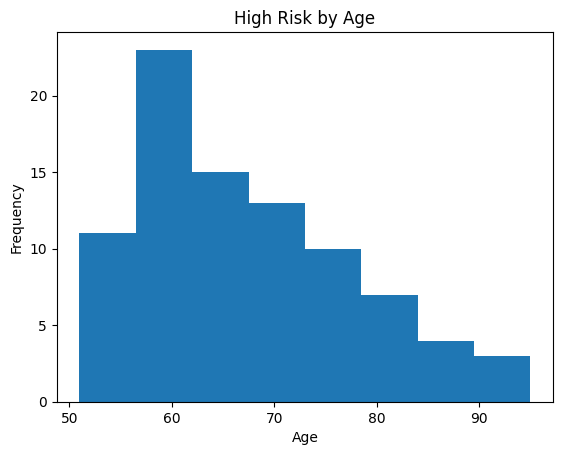

In [105]:
# TODO

# Visualize high risk by age

high_risk = df[df['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**V akom veku je riziko zlyhania srdca najväčšie?**

In [106]:
# TODO

ag = df[df['risk'] == 'High']['age'].value_counts().idxmax().max()
print(ag)
# 60


60.0


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [107]:
# TODO
ag = df[df['risk'] == 'High']['age'].value_counts().idxmax().max()
print(df.age.value_counts()[ag])


33


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


In [109]:
# TODO

# ghetto fix
df = df.drop('risk', axis=1)

c_m = df.corr()
print(c_m)



                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [98]:
# TODO

n_m = c_m[c_m< 0]
n_m_sorted = n_m.unstack().sort_values().head(4)
n_c_sorted= n_m_sorted[n_m_sorted != -1]
print(n_c_sorted.head(4))

DEATH_EVENT        time                -0.526964
time               DEATH_EVENT         -0.526964
DEATH_EVENT        ejection_fraction   -0.268603
ejection_fraction  DEATH_EVENT         -0.268603
dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [111]:
# TODO
import numpy as np

np.fill_diagonal(c_m.values, 0)
max_c= c_m.max().max()
max_c_p = c_m.stack().idxmax()

print(max_c_p)


('sex', 'smoking')


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure